In [1]:
# The Spark Foundation
# Krithika Rangaraj
# Task 3 : Expolatory Data Analysis in Retail
# Question : As a business manager, try to find out the weak areas where you can work to make more profit.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df =pd.read_csv("C:\\Users\\Krithika\\Desktop\\SampleSuperstore.csv")
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
# Data Preprocessing(Data wrangling)
#1.Checking for null values
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
#2. Checking for duplicates 
print('No of duplicated rows',df.duplicated().sum())

No of duplicated rows 17


In [7]:
print('No of rows and columns before removing duplicates:', df.shape)

No of rows and columns before removing duplicates: (9994, 13)


In [8]:
#3. Droping the rows which have duplicates
df.drop_duplicates(inplace= True)
# droping unwanted column
df.drop('Postal Code', axis = 1 , inplace = True) 
df.head(5)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
# Explortory data analysis
#1. To view satitical summary of dataset
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


In [10]:
# To view the correlation between variables
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


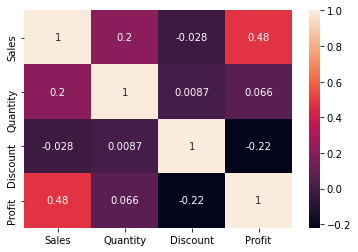

In [11]:
# Data Vizualization
#1. Visual representation of the Correlation Matrix 
sns.heatmap(df.corr(), annot = True)
plt.show()
#Result : Positive corelation between sales and profit

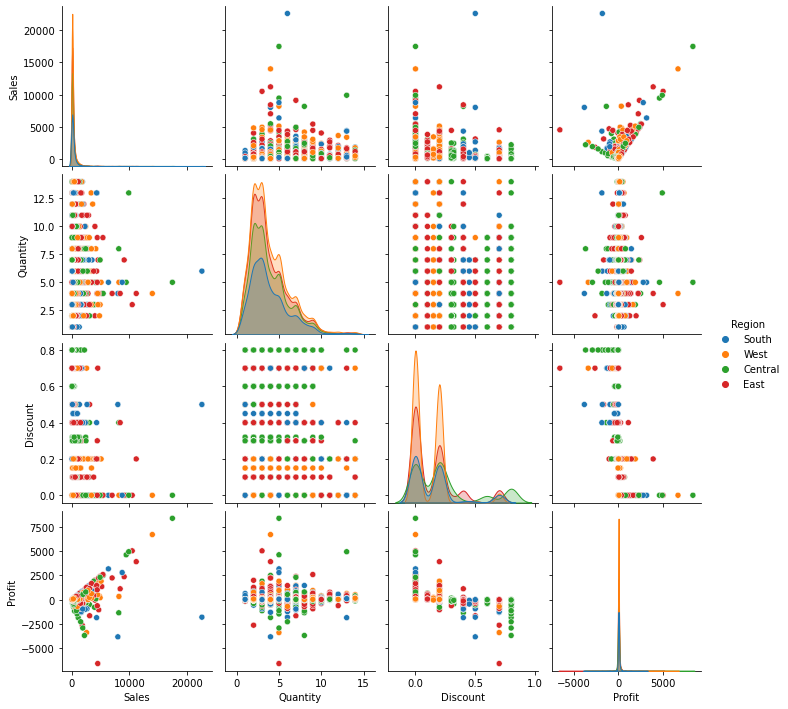

In [12]:
#2. Pair plot :  Evaluate the relations between different features of our dataset
sns.pairplot(df, hue = 'Region', height=2.5)


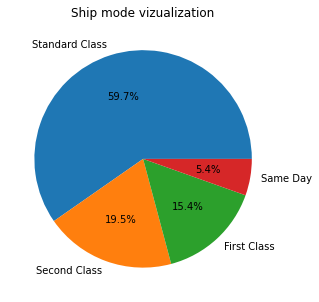

In [13]:
# 3. Pie chart vizualation for ship mode, Category og region to know the % of sale
plt.figure(figsize =(5,5))
plt.title('Ship mode vizualization')
plt.pie(df['Ship Mode'].value_counts(), labels=df['Ship Mode'].value_counts().index,autopct='%1.1f%%')
plt.show()
#Result : 'Standard class' is widely used and 'same day' is  used least


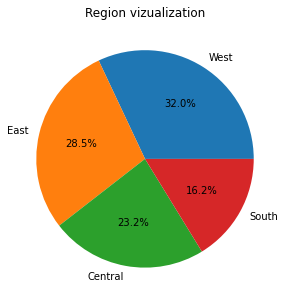

In [14]:
plt.figure(figsize =(5,5))
plt.title('Region vizualization')
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()
#Result : Product sales is higher in 'west' and lower in 'south' 


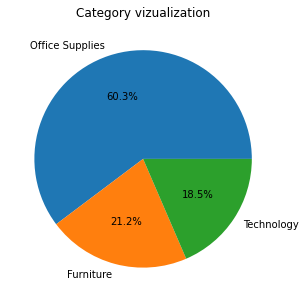

In [16]:
plt.figure(figsize =(5,5))
plt.title('Category vizualization')
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index,autopct='%1.1f%%')
plt.show()
#Result : 'Office supplies' sold  is higher and 'Technology ' sold  is lower


<AxesSubplot:title={'center':'Sub-Category vizualization'}, xlabel='Category', ylabel='count'>

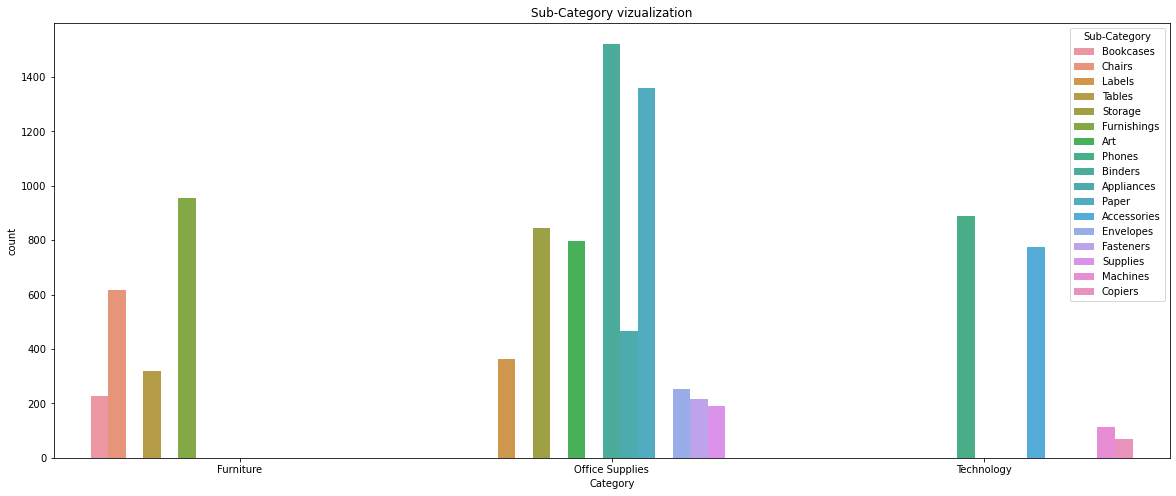

In [17]:
plt.figure(figsize=(20,8))
plt.title('Sub-Category vizualization')
sns.countplot(x=df['Category'], hue ='Sub-Category', data = df)
#Result : 'Binders' was sold  higher and 'Copiers' was sold lower


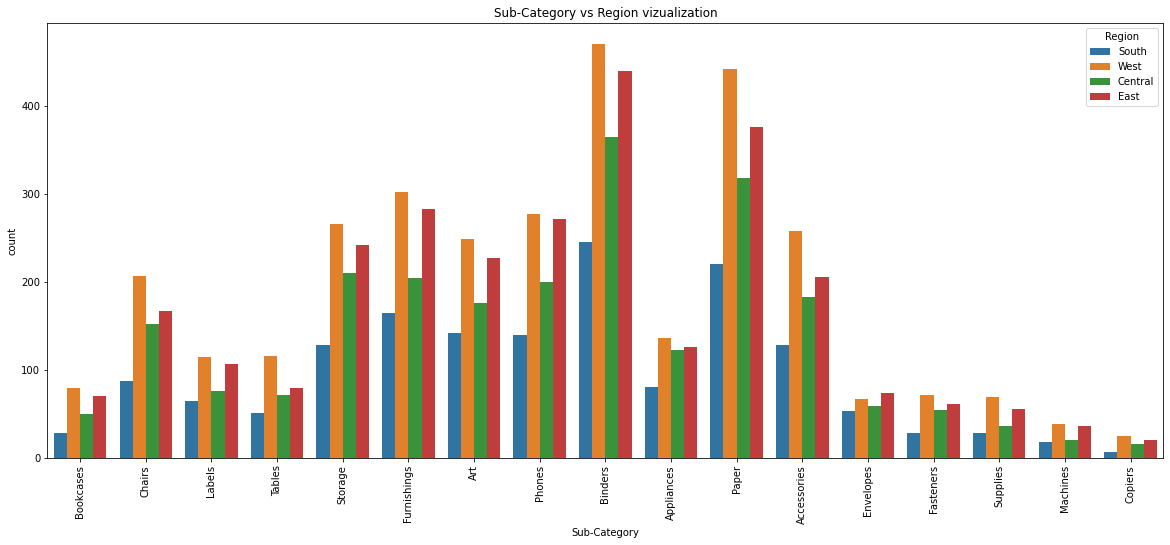

In [18]:
plt.figure(figsize=(20,8))
plt.title('Sub-Category vs Region vizualization')
sns.countplot(x='Sub-Category', hue = 'Region',data = df)
plt.xticks(rotation = 'vertical')
plt.show()
#Result : Binders and paper was sold higher in all region . Copier was sold very lower in all region

<ipython-input-19-70493b75b2e6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sub = df.groupby('Sub-Category')['Profit', 'Sales'].sum()


<AxesSubplot:xlabel='Sub-Category'>

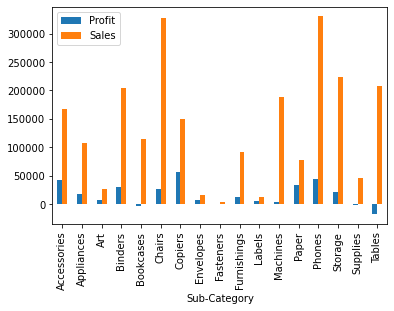

In [19]:
# 3. #Vizualating Sale and profit againt sub categories , state og discount
# 3a Againt sub categories
sub = df.groupby('Sub-Category')['Profit', 'Sales'].sum()
sub.plot.bar()
#Result : Copiers and Phones have the highest sales and profit and tables has negative profit. 
        # Also chairs have almost equal sale as phones but with low profit

<ipython-input-20-ad491618195c>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  state = df.groupby('State')['Profit', 'Sales'].sum()


<AxesSubplot:xlabel='State'>

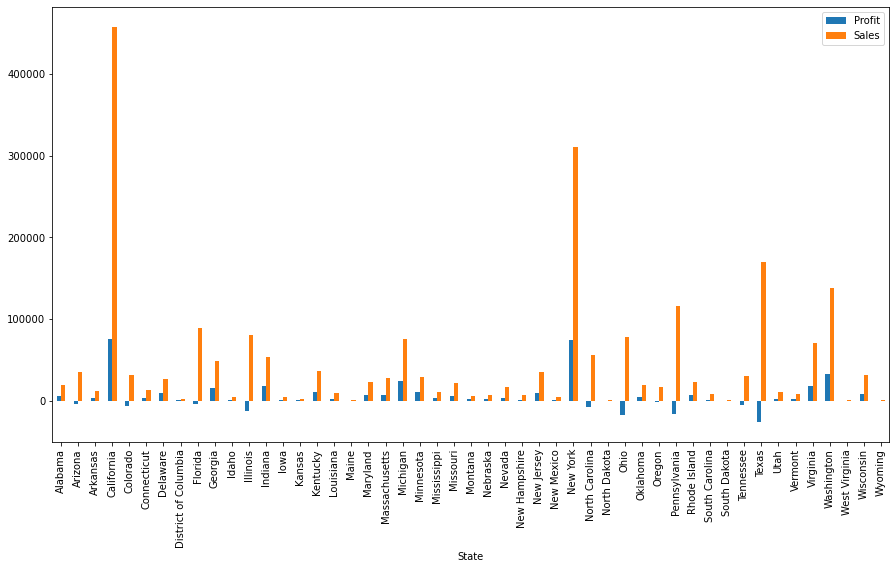

In [20]:
# 3b--> Againt states
state = df.groupby('State')['Profit', 'Sales'].sum()
state.plot.bar(figsize =(15,8))

#Result : California and New york have the highest sales and profit. Texas have  sale with zero porfit

<ipython-input-30-59b7c2c10306>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dis = df.groupby('Discount')['Profit', 'Sales'].sum()


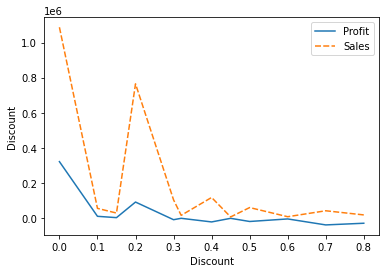

In [30]:
# 3c--> Againt Discount
dis = df.groupby('Discount')['Profit', 'Sales'].sum()
sns.lineplot(data =dis)
plt.ylabel('Discount')
plt.show()
# Result :More Discount on  products , increases sales but simulateneously decreases profit

In [36]:
# Conclusion from data vizualization :

#The business can focus more on increasing sales in the Southern Region.
#The business can increase the sale of copier in all region as it as good sale and profit
#The  business can focus on sub category( chair and phone) to increase the profit as these to have higher sale with low profit.In addtion business can focus on table as it good sale with neagtive 
#Higher sale with good profit in states like California and Newyork. Thus the business can focus have on state like Texas and Pensnsyivania as these has better sales  with negative profit
#Ship mode 'same day' is very lower. Thus busniess can reduce the shipping price so that cosumers try to use this service also.